<a href="https://colab.research.google.com/github/upayuryeva/Deep-Learning-course-HSE-/blob/main/week7/seminar7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
import transformers
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModel, pipeline
import numpy as np

### Using pre-trained transformers (2pts)
_for fun and profit_

There are many toolkits that let you access pre-trained transformer models, but the most powerful and convenient by far is [`huggingface/transformers`](https://github.com/huggingface/transformers). In this week's practice, you'll learn how to download, apply and modify pre-trained transformers for a range of tasks. Buckle up, we're going in!


__Pipelines:__ if all you want is to apply a pre-trained model, you can do that in one line of code using pipeline. Huggingface/transformers has a selection of pre-configured pipelines for masked language modelling, sentiment classification, question aswering, etc. ([see full list here](https://huggingface.co/transformers/main_classes/pipelines.html))

A typical pipeline includes:
* pre-processing, e.g. tokenization, subword segmentation
* a backbone model, e.g. bert finetuned for classification
* output post-processing

Let's see it in action:

In [ ]:
classifier = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

print(classifier("BERT is amazing!"))

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998860955238342}]


In [ ]:
import base64
data = {
    'arryn': 'As High as Honor.',
    'baratheon': 'Ours is the fury.',
    'stark': 'Winter is coming.',
    'tyrell': 'Growing strong.'
}

# YOUR CODE: predict sentiment for each noble house and create outputs dict
# <...>
# outputs = <YOUR CODE: dict (house name) : True if positive, False if negative>
outputs = {k:(True if classifier(v)[0]['label'] == 'POSITIVE' else False) for k, v in data.items()}

assert sum(outputs.values()) == 3 and outputs[base64.decodestring(b'YmFyYXRoZW9u\n').decode()] == False
print("Well done!")

Well done!


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: decodestring() is a deprecated alias since Python 3.1, use decodebytes()
  


You can also access vanilla Masked Language Model that was trained to predict masked words. Here's how:

In [ ]:
mlm_model = pipeline('fill-mask', model="bert-base-uncased")
MASK = mlm_model.tokenizer.mask_token

for hypo in mlm_model(f"Donald {MASK} is the president of the united states."):
  print(f"P={hypo['score']:.5f}", hypo['sequence'])

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

P=0.99719 donald trump is the president of the united states.
P=0.00024 donald duck is the president of the united states.
P=0.00022 donald ross is the president of the united states.
P=0.00020 donald johnson is the president of the united states.
P=0.00018 donald wilson is the president of the united states.


In [ ]:
# Your turn: use bert to recall what year was the Soviet Union founded in
# mlm_model(<YOUR PROMPT>)
for hypo in mlm_model(f"The Soviet Union was founded in year {MASK}."):
  print(f"P={hypo['score']:.5f}", hypo['sequence'])

P=0.03702 the soviet union was founded in year ii.
P=0.03054 the soviet union was founded in year 1945.
P=0.02764 the soviet union was founded in year 1917.
P=0.02324 the soviet union was founded in year 1918.
P=0.01754 the soviet union was founded in year 1949.


```

```

```

```


Huggingface offers hundreds of pre-trained models that specialize on different tasks. You can quickly find the model you need using [this list](https://huggingface.co/models).


In [ ]:
text = """Almost two-thirds of the 1.5 million people who viewed this liveblog had Googled to discover
 the latest on the Rosetta mission. They were treated to this detailed account by the Guardian’s science editor,
 Ian Sample, and astronomy writer Stuart Clark of the moment scientists landed a robotic spacecraft on a comet 
 for the first time in history, and the delirious reaction it provoked at their headquarters in Germany.
  “We are there. We are sitting on the surface. Philae is talking to us,” said one scientist.
"""

# Task: create a pipeline for named entity recognition, use task name 'ner' and search for the right model in the list
ner_model = pipeline('ner')

named_entities = ner_model(text)

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

In [ ]:
print('OUTPUT:', named_entities)
word_to_entity = {item['word']: item['entity'] for item in named_entities}
assert 'org' in word_to_entity.get('Guardian').lower() and 'per' in word_to_entity.get('Stuart').lower()
print("All tests passed")

OUTPUT: [{'word': 'Google', 'score': 0.8803115487098694, 'entity': 'I-MISC', 'index': 19, 'start': 73, 'end': 79}, {'word': 'Rose', 'score': 0.9005069732666016, 'entity': 'I-MISC', 'index': 27, 'start': 112, 'end': 116}, {'word': '##tta', 'score': 0.9509624242782593, 'entity': 'I-MISC', 'index': 28, 'start': 116, 'end': 119}, {'word': 'Guardian', 'score': 0.9992534518241882, 'entity': 'I-ORG', 'index': 40, 'start': 179, 'end': 187}, {'word': 'Ian', 'score': 0.9992009401321411, 'entity': 'I-PER', 'index': 46, 'start': 207, 'end': 210}, {'word': 'Sam', 'score': 0.999500036239624, 'entity': 'I-PER', 'index': 47, 'start': 211, 'end': 214}, {'word': '##ple', 'score': 0.9964978694915771, 'entity': 'I-PER', 'index': 48, 'start': 214, 'end': 217}, {'word': 'Stuart', 'score': 0.9991856217384338, 'entity': 'I-PER', 'index': 53, 'start': 240, 'end': 246}, {'word': 'Clark', 'score': 0.99964839220047, 'entity': 'I-PER', 'index': 54, 'start': 247, 'end': 252}, {'word': 'Germany', 'score': 0.99982106

### The building blocks of a pipeline

Huggingface also allows you to access its pipelines on a lower level. There are two main abstractions for you:
* `Tokenizer` - converts from strings to token ids and back
* `Model` - a pytorch `nn.Module` with pre-trained weights

You can use such models as part of your regular pytorch code: insert is as a layer in your model, apply it to a batch of data, backpropagate, optimize, etc.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel, pipeline

model_name = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

In [ ]:
lines = [
    "Luke, I am your father.",
    "Life is what happens when you're busy making other plans.",
    ]

# tokenize a batch of inputs. "pt" means [p]y[t]orch tensors
tokens_info = tokenizer(lines, padding=True, truncation=True, return_tensors="pt")

for key in tokens_info:
    print(key, tokens_info[key])

print("Detokenized:")
for i in range(2):
    print(tokenizer.decode(tokens_info['input_ids'][i]))

input_ids tensor([[    0, 34899,     6,    38,   524,   110,  1150,     4,     2,     1,
             1,     1,     1,     1],
        [    0, 12116,    16,    99,  2594,    77,    47,   214,  3610,   442,
            97,   708,     4,     2]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Detokenized:
<s>Luke, I am your father.</s><pad><pad><pad><pad><pad>
<s>Life is what happens when you're busy making other plans.</s>


In [ ]:
# You can now apply the model to get embeddings
with torch.no_grad():
    out = model(**tokens_info)

print(out)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-1.6231e-01,  1.2745e-01, -9.0214e-03,  ..., -9.9343e-02,
          -9.1144e-03, -7.9819e-02],
         [ 8.9304e-02,  5.6673e-02, -7.1221e-02,  ..., -5.0213e-01,
           1.0334e-01, -7.1580e-02],
         [ 1.5001e-01,  1.4505e-01,  6.5753e-02,  ..., -5.6259e-02,
          -1.8313e-01, -8.9051e-02],
         ...,
         [ 1.3349e-02,  1.0767e-01, -1.5948e-01,  ..., -2.4475e-01,
          -1.1423e-01, -1.4374e-01],
         [ 1.3349e-02,  1.0767e-01, -1.5948e-01,  ..., -2.4475e-01,
          -1.1423e-01, -1.4374e-01],
         [ 1.3349e-02,  1.0767e-01, -1.5948e-01,  ..., -2.4475e-01,
          -1.1423e-01, -1.4374e-01]],

        [[-1.2852e-01,  1.3935e-01, -1.9362e-03,  ..., -9.3997e-02,
          -3.1349e-04, -2.2275e-02],
         [ 7.1255e-02,  2.5677e-01,  7.0792e-02,  ...,  1.5944e-01,
           1.5432e-01,  1.7219e-01],
         [-8.4597e-02,  3.6396e-01,  1.0735e-01,  ..., -3.3869e-01,
           1.

### Fine-tuning for salary prediction (5 pts)

Now let's put all this monstrosity to good use!

Remember week5 when you've trained a convolutional neural network for salary prediction? Now let's see how transformers fare at this task.

__The goal__ is to take one or more pre-trained models and fine-tune it for salary prediction. A good baseline solution would be to get RoBerta or T5 from [huggingface model list](https://huggingface.co/models) and fine-tune it to solve the task. After choosing the model, please take care to use the matching Tokenizer for preprocessing, as different models have different preprocessing requirements.


There are no prompts this time: you will have to write everything from scratch. Although, feel free to reuse any code from the original salary prediction notebook :)

In [ ]:
!wget https://www.dropbox.com/s/r9d1f3ve471osob/Train_rev1.zip?dl=1 -O data.zip
!unzip -e data.zip

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
--2021-11-10 14:30:56--  https://www.dropbox.com/s/r9d1f3ve471osob/Train_rev1.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/r9d1f3ve471osob/Train_rev1.zip [following]
--2021-11-10 14:30:57--  https://www.dropbox.com/s/dl/r9d1f3ve471osob/Train_rev1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc14139965a6b802af79ed78c384.dl.dropboxusercontent.com/cd/0/get/BZudtc_MB7K-83-6ZIQ76RWLieKxeNy

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("./Train_rev1.csv", index_col=None)
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')

text_columns = ["Title", "FullDescription"]
categorical_columns = ["Category", "Company", "LocationNormalized", "ContractType", "ContractTime"]
target_column = "Log1pSalary"
data[categorical_columns] = data[categorical_columns].fillna('NaN') # cast nan to string

data = data.dropna()

data.sample(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Log1pSalary
141482,70589626,Sales Admin Assistant,Our client based in Mildenhall seeks an experi...,Mildenhall,Mildenhall,full_time,NaN,Advantage Recruitment Ltd,Admin Jobs,"15,000.00 - 18,000.00 per year",16500,Jobcentre Plus,9.711176
226890,72442949,Credit Controller,My client require a Credit Controller for a Te...,Redditch Worcestershire West Midlands,Redditch,NaN,contract,Touch Recruitment Ltd,Customer Services Jobs,Up to 6.50 per hour,12480,totaljobs.com,9.431963
212128,72228307,Head Chef New Brasserie Opening Milton Keyne...,Great Package on offer for an able Head Chef o...,"Milton Keynes, Buckinghamshire, UK, Buckingham...",Milton Keynes,NaN,NaN,PTHR International Restaurants Bars,Hospitality & Catering Jobs,"From 28,000 to 35,000 per annum NEW OPENING!",31500,jobs.catererandhotelkeeper.com,10.357775


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel, pipeline

model_name = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


(array([5.6360e+03, 5.3403e+04, 5.8635e+04, 3.8919e+04, 0.0000e+00,
        2.8820e+04, 2.1718e+04, 1.4915e+04, 0.0000e+00, 9.8250e+03,
        6.1370e+03, 3.3670e+03, 0.0000e+00, 1.6870e+03, 8.1800e+02,
        4.1200e+02, 1.8400e+02, 0.0000e+00, 1.2800e+02, 7.3000e+01,
        3.8000e+01, 0.0000e+00, 1.1000e+01, 1.2000e+01, 9.0000e+00,
        0.0000e+00, 4.0000e+00, 5.0000e+00, 7.0000e+00, 3.0000e+00]),
 array([ 1.        ,  1.76666667,  2.53333333,  3.3       ,  4.06666667,
         4.83333333,  5.6       ,  6.36666667,  7.13333333,  7.9       ,
         8.66666667,  9.43333333, 10.2       , 10.96666667, 11.73333333,
        12.5       , 13.26666667, 14.03333333, 14.8       , 15.56666667,
        16.33333333, 17.1       , 17.86666667, 18.63333333, 19.4       ,
        20.16666667, 20.93333333, 21.7       , 22.46666667, 23.23333333,
        24.        ]),
 <BarContainer object of 30 artists>)

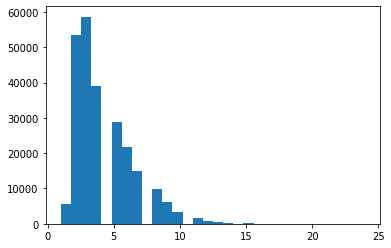

In [ ]:
import matplotlib

matplotlib.pyplot.hist(list(map(len, list(map(lambda x: x.split(), data["Title"].values)))), bins=30)

(array([1.1930e+03, 5.8850e+03, 6.5280e+03, 8.4140e+03, 1.1656e+04,
        1.4338e+04, 1.6324e+04, 1.7367e+04, 1.7728e+04, 1.8064e+04,
        1.7530e+04, 1.6188e+04, 1.4568e+04, 1.3420e+04, 1.1420e+04,
        9.5560e+03, 7.8940e+03, 6.7130e+03, 5.5170e+03, 4.4110e+03,
        3.6240e+03, 2.9300e+03, 2.6170e+03, 2.0230e+03, 1.6650e+03,
        1.2960e+03, 1.0810e+03, 8.9700e+02, 6.8200e+02, 5.4800e+02,
        4.7200e+02, 3.4500e+02, 2.9400e+02, 2.5600e+02, 1.8000e+02,
        2.3200e+02, 1.9600e+02, 9.7000e+01, 9.7000e+01, 8.6000e+01,
        5.7000e+01, 3.6000e+01, 5.3000e+01, 3.9000e+01, 3.4000e+01,
        2.8000e+01, 2.4000e+01, 1.7000e+01, 1.5000e+01, 1.3000e+01,
        1.9000e+01, 1.5000e+01, 1.0000e+01, 4.0000e+00, 1.1000e+01,
        7.0000e+00, 2.0000e+00, 6.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 0.00

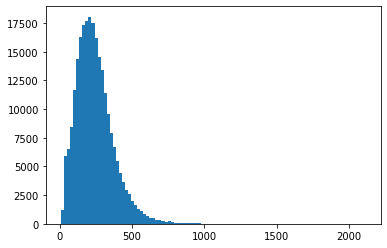

In [ ]:
matplotlib.pyplot.hist(list(map(len, list(map(lambda x: x.split(), data["FullDescription"].values)))), bins=100)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
def to_gpu(Tokenizer_output):
  output = {}
  for k, v in Tokenizer_output.items():
    output[k] = v.to(device)

  return output

In [ ]:
from tqdm import trange

I commented this code because I saved torch tensors

In [ ]:
# from tqdm import trange

# title_emb = torch.empty((0)).to(device)
# indexes = list(range(0, data.shape[0], 128))
# indexes.append(data.shape[0])
# for ii in trange(0, len(indexes) - 1):
#   i = indexes[ii]
#   j = indexes[ii + 1]
#   tokens_info = tokenizer(list(data["Title"].iloc[i:j].values), padding=True, truncation=True, return_tensors="pt", max_length=15)
#   with torch.no_grad():
#       out = model(**tokens_info)

#   title_emb = torch.cat((title_emb, out['pooler_output']), 0) 

  # tokens_info_2 = tokenizer(list(data['FullDescription'].iloc[i:j].values), padding=True, truncation=True, return_tensors="pt", max_length=500)
  # with torch.no_grad():
  #     out_2 = model(**tokens_info_2)

  
  # desc_emb = torch.cat((desc_emb, out_2.pooler_output), 0) 


In [ ]:
# indexes = list(range(0, data.shape[0], 128))
# indexes.append(data.shape[0])
# desc_emb = torch.empty((0))
# for ii in trange(0, len(indexes) - 1):
#   i = indexes[ii]
#   j = indexes[ii + 1]
#   tokens_info = tokenizer(list(data['FullDescription'].iloc[i:j].values), padding=True, truncation=True, return_tensors="pt", max_length=15)
#   with torch.no_grad():
#       out = model(**tokens_info)
  
#   desc_emb = torch.cat((desc_emb, out['pooler_output']), 0) 

In [ ]:
# torch.save(title_emb, 'title_emb.pt')

In [ ]:
# torch.save(desc_emb, 'desc_emb.pt')

In [ ]:
title_emb = torch.load('../input/seminar7-data/title_emb.pt')

In [ ]:
desс_emb = torch.load('../input/seminar7-data/desc_emb.pt') 

In [ ]:
dict_emb = {}
dict_emb['FullDescription'] = desс_emb
dict_emb['Title'] = title_emb

In [ ]:
from sklearn.model_selection import train_test_split
dict_emb_test = {}
dict_emb_train = {}

data_train, data_val, dict_emb_train['FullDescription'], dict_emb_test['FullDescription'], dict_emb_train['Title'], dict_emb_test['Title'] = train_test_split(data, dict_emb['FullDescription'], dict_emb['Title'], test_size=0.1, random_state=42)

print("Train size = ", len(data_train))
print("Validation size = ", len(data_val))

Train size =  220289
Validation size =  24477


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from collections import Counter

# we only consider top-1k most frequent companies to minimize memory usage
top_companies, top_counts = zip(*Counter(data['Company']).most_common(1000))
recognized_companies = set(top_companies)
data["Company"] = data["Company"].apply(lambda comp: comp if comp in recognized_companies else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(data[categorical_columns].apply(dict, axis=1))

DictVectorizer(dtype=<class 'numpy.float32'>, sparse=False)

In [ ]:
def generate_batch(data, emb, batch_size=None, replace=True, max_len=None):
    """
    Creates a pytorch-friendly dict from the batch data.
    :returns: a dict with {'title' : int64[batch, title_max_len]
    """
    if batch_size is not None:
        data = data.sample(batch_size, replace=replace)
    
    batch = {}
    for col in text_columns:
        batch[col] = emb[col][:,:max_len]
    
    batch['Categorical'] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if target_column in data.columns:
        batch[target_column] = data[target_column].values
    
    return batch

In [ ]:
generate_batch(data_train, dict_emb, 3, max_len=10)

{'Title': tensor([[ 0.0034, -0.2081, -0.2206,  ..., -0.0828, -0.0623, -0.1728],
         [-0.0012, -0.2126, -0.2169,  ..., -0.0880, -0.0598, -0.1694],
         [-0.0046, -0.2096, -0.2174,  ..., -0.0875, -0.0593, -0.1712],
         ...,
         [ 0.0024, -0.2189, -0.2300,  ..., -0.0812, -0.0680, -0.1704],
         [-0.0052, -0.2216, -0.2247,  ..., -0.0896, -0.0465, -0.1786],
         [-0.0007, -0.2151, -0.2240,  ..., -0.0860, -0.0682, -0.1690]]),
 'FullDescription': tensor([[-9.4442e-05, -2.1875e-01, -2.3674e-01,  ..., -8.4770e-02,
          -6.5767e-02, -1.6556e-01],
         [ 3.7353e-03, -2.2302e-01, -2.1797e-01,  ..., -6.3446e-02,
          -6.7696e-02, -1.6770e-01],
         [-7.4786e-03, -2.0219e-01, -2.2676e-01,  ..., -6.4800e-02,
          -6.9304e-02, -1.6972e-01],
         ...,
         [ 1.8934e-04, -2.2454e-01, -2.3163e-01,  ..., -7.4595e-02,
          -6.1491e-02, -1.7638e-01],
         [ 4.8062e-03, -2.1392e-01, -2.2853e-01,  ..., -7.2845e-02,
          -6.1521e-02, -1.76

In [ ]:
def compute_loss(reference, prediction):
    """
    Computes objective for minimization.
    By deafult we minimize MSE, but you are encouraged to try mix up MSE, MAE, huber loss, etc.
    """
    return torch.mean((prediction - reference) ** 2)

def compute_mae(reference, prediction):
    """ Compute MAE on actual salary, assuming your model outputs log1p(salary)"""
    return torch.abs(torch.exp(reference - 1) - torch.exp(prediction - 1)).mean()

In [ ]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class GlobalMaxPooling(nn.Module):
    def __init__(self, dim=-1):
        super(self.__class__, self).__init__()
        self.dim = dim
        
    def forward(self, x):
        return x.max(dim=self.dim)[0]

In [ ]:
class NewTitleEncoder(nn.Module):

    def __init__(self, out_size=32): # n_tokens=len(tokens),
        super(self.__class__, self).__init__()
        self.dense = nn.Linear(768, out_size)

    def forward(self, text_ix, hidden=None):
        h = text_ix
        h = self.dense(h)

        return h

In [ ]:
class NewDescriptionEncoder(nn.Module):
    def __init__(self, out_size=32): # n_tokens=len(tokens),
        super(self.__class__, self).__init__()
        self.dense = nn.Linear(768, out_size)

    def forward(self, text_ix, hidden=None):
        h = text_ix
        h = self.dense(h)

        return h



In [ ]:
class NewFullNetwork(nn.Module):
    """
    This class does all the steps from (title, desc, categorical) features -> predicted target
    It unites title & desc encoders you defined above as long as some layers for head and categorical branch.
    """
    
    def __init__(self,  n_cat_features=len(categorical_vectorizer.vocabulary_)): #n_tokens=len(tokens),
        super(self.__class__, self).__init__()
        
        self.title_encoder = NewTitleEncoder(out_size=64)
        self.desc_encoder = NewDescriptionEncoder(out_size=64)
        
        # define layers for categorical features. A few dense layers would do.
        self.layers = nn.Sequential(
            nn.Linear(n_cat_features, 128),
            nn.ReLU(),
            nn.Linear(128, 32)
        )
        
        # define "output" layers that process depend the three encoded vectors into answer
        self.out = nn.Linear(160, 1)
        
        
    def forward(self, title_ix, desc_ix, cat_features):
        """
        :param title_ix: int32 Variable [batch, title_len], job titles encoded by as_matrix
        :param desc_ix:  int32 Variable [batch, desc_len] , job descriptions encoded by as_matrix
        :param cat_features: float32 Variable [batch, n_cat_features]
        :returns: float32 Variable 1d [batch], predicted log1p-salary
        """
        
        # process each data source with it's respective encoder
        title_h = self.title_encoder(title_ix)
        desc_h = self.desc_encoder(desc_ix)
        
        # apply categorical encoder
        cat_h = self.layers(cat_features)
        
        # concatenate all vectors together...
        joint_h = torch.cat([title_h, desc_h, cat_h], dim=1)
        
        # ... and stack a few more layers at the top
        out = self.out(joint_h)
        
        # Note 1: do not forget to select first columns, [:, 0], to get to 1d outputs
        # Note 2: please do not use output nonlinearities.
        
        return out[:, 0]

In [ ]:
model = NewFullNetwork()
model = model.to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
from tqdm import tnrange
def iterate_minibatches(data, emb, batch_size=32, max_len=None,
                        max_batches=None, shuffle=True, verbose=True):
    indices = np.arange(len(data))
    if shuffle:
        indices = np.random.permutation(indices)
    if max_batches is not None:
        indices = indices[: batch_size * max_batches]
        
    irange = tnrange if verbose else range
    
    
    for start in irange(0, len(indices), batch_size):
        yield generate_batch(data.iloc[indices[start : start + batch_size]], {k:v[indices[start : start + batch_size]] for k,v in emb.items()}, max_len=max_len)

In [ ]:
num_epochs = 100
max_len = 100
batch_size = 128
batches_per_epoch = 100

In [ ]:
for epoch_i in range(num_epochs):
    
    print("Training:")
    train_loss = train_mae = train_batches = 0    
    model.train(True)
    
    for batch in iterate_minibatches(data_train, dict_emb_train, max_batches=batches_per_epoch):

        title_ix = Variable(torch.FloatTensor(batch["Title"])).to(device)
        desc_ix = Variable(torch.FloatTensor(batch["FullDescription"])).to(device)
        cat_features = Variable(torch.FloatTensor(batch["Categorical"])).to(device)
        reference = Variable(torch.FloatTensor(batch[target_column])).to(device)

        prediction = model(title_ix, desc_ix, cat_features)

        loss = compute_loss(reference, prediction)
        loss.backward()
        opt.step()
        opt.zero_grad()

        train_loss += loss.cpu().data.numpy()
        train_mae += compute_mae(reference, prediction).cpu().data.numpy()
        train_batches += 1
    
    print("\tLoss:\t%.5f" % (train_loss / train_batches))
    print("\tMAE:\t%.5f" % (train_mae / train_batches))
    print('\n\n')
    
    print("Validation:")
    val_loss = val_mae = val_batches = 0
    model.train(False)
    
    with torch.no_grad():
        for batch in iterate_minibatches(data_val, dict_emb_test, shuffle=False):
            title_ix = Variable(torch.FloatTensor(batch["Title"])).to(device)
            desc_ix = Variable(torch.FloatTensor(batch["FullDescription"])).to(device)
            cat_features = Variable(torch.FloatTensor(batch["Categorical"])).to(device)
            reference = Variable(torch.FloatTensor(batch[target_column])).to(device)

            prediction = model(title_ix, desc_ix, cat_features)
            loss = compute_loss(reference, prediction)

            val_loss += loss.cpu().data.numpy()
            val_mae += compute_mae(reference, prediction).cpu().data.numpy()
            val_batches += 1

    print("\tLoss:\t%.5f" % (val_loss / val_batches))
    print("\tMAE:\t%.5f" % (val_mae / val_batches))
    print('\n\n')

Training:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  del sys.path[0]


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	6.66219
	MAE:	18756.12394



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.25634
	MAE:	4913.12470



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.26306
	MAE:	4918.49490



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.22529
	MAE:	4621.23362



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.19819
	MAE:	4267.33468



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.18968
	MAE:	4227.38375



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.17819
	MAE:	4071.19024



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.17646
	MAE:	4076.73116



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.17259
	MAE:	4033.70206



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.18998
	MAE:	4315.26702



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.17561
	MAE:	4059.53117



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.16676
	MAE:	3963.17523



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15995
	MAE:	3829.00545



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.16643
	MAE:	3953.78086



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.16422
	MAE:	3866.63137



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.16179
	MAE:	3911.14175



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.16839
	MAE:	3946.74028



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.16019
	MAE:	3895.49048



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.16625
	MAE:	3887.34629



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.18811
	MAE:	4171.14284



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15836
	MAE:	3871.76901



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15926
	MAE:	3884.58373



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15356
	MAE:	3762.37435



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.16568
	MAE:	3984.38732



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.16164
	MAE:	3923.55599



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15626
	MAE:	3821.65385



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14687
	MAE:	3724.37697



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15123
	MAE:	3755.08665



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15307
	MAE:	3772.07074



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15644
	MAE:	3819.52963



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15281
	MAE:	3784.51976



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15566
	MAE:	3800.30825



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15963
	MAE:	3792.61380



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14906
	MAE:	3733.39943



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15534
	MAE:	3768.02927



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14751
	MAE:	3726.47031



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14976
	MAE:	3728.30714



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14516
	MAE:	3684.07795



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14966
	MAE:	3729.26546



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14430
	MAE:	3670.23742



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14204
	MAE:	3743.30084



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14680
	MAE:	3704.45005



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15037
	MAE:	3720.88281



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.17509
	MAE:	4029.98469



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14402
	MAE:	3646.17886



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14171
	MAE:	3634.18925



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14113
	MAE:	3732.16758



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14141
	MAE:	3623.85356



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14387
	MAE:	3670.71214



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14049
	MAE:	3622.41200



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.16395
	MAE:	3877.55805



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.27096
	MAE:	5668.61684



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14573
	MAE:	3764.27376



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14269
	MAE:	3634.41274



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14067
	MAE:	3628.80982



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14045
	MAE:	3614.16779



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14879
	MAE:	3743.26723



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15974
	MAE:	3919.79005



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13867
	MAE:	3559.17809



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13844
	MAE:	3584.04181



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15374
	MAE:	3787.78905



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.18295
	MAE:	4108.07190



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14714
	MAE:	3661.72638



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.16279
	MAE:	3981.96153



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14581
	MAE:	3638.99742



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13709
	MAE:	3566.70657



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13677
	MAE:	3622.35271



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15834
	MAE:	3831.76336



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15104
	MAE:	3676.75912



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13294
	MAE:	3513.03366



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14525
	MAE:	3673.00720



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13377
	MAE:	3520.29287



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14553
	MAE:	3721.38560



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13561
	MAE:	3543.38537



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13774
	MAE:	3603.69945



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.19448
	MAE:	4525.99007



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14952
	MAE:	3833.57609



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14847
	MAE:	3699.13446



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13992
	MAE:	3616.91371



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13149
	MAE:	3487.29516



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15031
	MAE:	3840.34776



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13021
	MAE:	3463.85345



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13233
	MAE:	3526.66004



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13844
	MAE:	3604.63009



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13675
	MAE:	3521.90963



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13915
	MAE:	3600.09161



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14329
	MAE:	3659.24032



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15532
	MAE:	3765.76230



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13176
	MAE:	3542.51893



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13738
	MAE:	3588.76344



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14310
	MAE:	3627.67670



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13320
	MAE:	3509.84025



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14055
	MAE:	3577.52422



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12811
	MAE:	3445.27610



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13796
	MAE:	3557.10528



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15756
	MAE:	3919.64279



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12736
	MAE:	3380.16954



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12774
	MAE:	3440.52503



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13546
	MAE:	3551.79846



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13808
	MAE:	3563.96332



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13441
	MAE:	3595.56538



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12639
	MAE:	3410.15050



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12906
	MAE:	3502.89028



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14718
	MAE:	3667.69664



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13157
	MAE:	3472.80493



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.17154
	MAE:	4209.77043



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13688
	MAE:	3572.04297



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13823
	MAE:	3600.39271



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14512
	MAE:	3713.44656



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12979
	MAE:	3477.24664



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12879
	MAE:	3445.41451



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12431
	MAE:	3393.47367



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13194
	MAE:	3475.29467



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15086
	MAE:	3841.76465



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14754
	MAE:	3710.45761



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12769
	MAE:	3429.23692



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.15201
	MAE:	3775.90711



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13117
	MAE:	3495.40345



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12926
	MAE:	3470.37760



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12452
	MAE:	3385.31583



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12667
	MAE:	3427.08525



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12316
	MAE:	3371.95131



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13364
	MAE:	3539.28632



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15511
	MAE:	3754.35511



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13185
	MAE:	3466.01959



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12935
	MAE:	3440.54115



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13518
	MAE:	3566.53607



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12557
	MAE:	3400.77461



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12576
	MAE:	3434.37010



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14027
	MAE:	3597.89149



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12697
	MAE:	3430.35807



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14168
	MAE:	3614.50692



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12815
	MAE:	3401.12063



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15237
	MAE:	3870.43431



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12627
	MAE:	3435.28695



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13507
	MAE:	3567.81900



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14283
	MAE:	3661.67274



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.25128
	MAE:	5527.93551



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12548
	MAE:	3430.98270



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12223
	MAE:	3349.32658



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12497
	MAE:	3386.01963



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12233
	MAE:	3354.16524



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14756
	MAE:	3693.43395



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13424
	MAE:	3569.70025



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13851
	MAE:	3597.83815



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13698
	MAE:	3533.33902



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12788
	MAE:	3429.39903



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.18499
	MAE:	4108.29428



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.11996
	MAE:	3348.60980



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12262
	MAE:	3361.53891



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12861
	MAE:	3537.20238



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.17244
	MAE:	4207.57800



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12985
	MAE:	3416.28894



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13595
	MAE:	3533.64971



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12838
	MAE:	3402.52020



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14612
	MAE:	3800.58332



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12420
	MAE:	3403.55868



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12148
	MAE:	3346.25703



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12623
	MAE:	3428.85601



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.14320
	MAE:	3731.14412



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.14268
	MAE:	3592.71380



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12297
	MAE:	3381.09137



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12298
	MAE:	3367.19721



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12248
	MAE:	3363.63414



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13599
	MAE:	3596.91421



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15966
	MAE:	3808.24741



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13439
	MAE:	3495.15929



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12014
	MAE:	3324.61838



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.11902
	MAE:	3333.87211



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13323
	MAE:	3505.81603



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12717
	MAE:	3364.79477



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12661
	MAE:	3403.38079



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12631
	MAE:	3425.95916



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12477
	MAE:	3374.60816



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13442
	MAE:	3532.53246



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12924
	MAE:	3445.46550



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12271
	MAE:	3363.10918



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.13423
	MAE:	3509.77020



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.11993
	MAE:	3350.13046



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.15359
	MAE:	3746.48362



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12092
	MAE:	3327.96844



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12468
	MAE:	3398.00261



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.11992
	MAE:	3328.09030



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12046
	MAE:	3315.01713



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12980
	MAE:	3488.89323



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.11973
	MAE:	3300.59074



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12747
	MAE:	3494.67027



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12846
	MAE:	3458.32237



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12767
	MAE:	3437.22132



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12439
	MAE:	3396.44462



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12698
	MAE:	3381.63406



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.12134
	MAE:	3328.77818



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12505
	MAE:	3446.69136



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.18673
	MAE:	4475.30898



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12273
	MAE:	3418.56456



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.11850
	MAE:	3285.65055



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.12526
	MAE:	3424.94041



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.11839
	MAE:	3295.60955



Training:


  0%|          | 0/100 [00:00<?, ?it/s]

	Loss:	0.13631
	MAE:	3565.70336



Validation:


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.11873
	MAE:	3298.83866





In [ ]:
print("Final eval:")
val_loss = val_mae = val_batches = 0

with torch.no_grad():
    for batch in iterate_minibatches(data_val, dict_emb_test, shuffle=False):
        title_ix = Variable(torch.FloatTensor(batch["Title"])).to(device)
        desc_ix = Variable(torch.FloatTensor(batch["FullDescription"])).to(device)
        cat_features = Variable(torch.FloatTensor(batch["Categorical"])).to(device)
        reference = Variable(torch.FloatTensor(batch[target_column])).to(device)

        prediction = model(title_ix, desc_ix, cat_features)
        loss = compute_loss(reference, prediction)

        val_loss += loss.cpu().data.numpy()
        val_mae += compute_mae(reference, prediction).cpu().data.numpy()
        val_batches += 1

print("\tLoss:\t%.5f" % (val_loss / val_batches))
print("\tMAE:\t%.5f" % (val_mae / val_batches))
print('\n\n')

Final eval:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  del sys.path[0]


  0%|          | 0/765 [00:00<?, ?it/s]

	Loss:	0.11873
	MAE:	3298.83866





### The search for similar questions (3pts)

* Implement a function that takes a text string and finds top-k most similar questions from `quora.txt`
* Demonstrate your function using at least 5 examples

There are no prompts this time: you will have to write everything from scratch.


In [ ]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
--2021-11-10 14:37:53--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2021-11-10 14:37:53--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc23d6c5793c9933ee360bdfb7c1.dl.dropboxusercontent.com/cd/0/get/BZslEn1ldpfYO42PIQWTcW1MMnAGKMgGGDl2JcOGFXceC0

In [ ]:
f = open("quora.txt", "r")
quora_list = list(map(lambda x: x[:-1], f.readlines()))

In [ ]:
quora_list[:5]

["Can I get back with my ex even though she is pregnant with another guy's baby?",
 'What are some ways to overcome a fast food addiction?',
 'Who were the great Chinese soldiers and leaders who fought in WW2?',
 'What are ZIP codes in the Bay Area?',
 'Why was George RR Martin critical of JK Rowling after losing the Hugo award?']

(array([1.63100e+05, 2.65807e+05, 7.10080e+04, 3.06020e+04, 3.74100e+03,
        1.62100e+03, 7.75000e+02, 5.18000e+02, 4.50000e+01, 2.00000e+01,
        1.10000e+01, 5.00000e+00, 5.00000e+00, 3.00000e+00, 3.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   4.        ,   42.83333333,   81.66666667,  120.5       ,
         159.33333333,  198.16666667,  237.        ,  275.83333333,
         314.66666667,  353.5       ,  392.33333333,  431.16666667,
         470.        ,  508.83333333,  547.66666667,  586.5       ,
         625.33333333,  664.16666667,  703.        ,  741.83333333,
         780.66666667,  819.5       ,  858.33333333,  897.16666667,
         936.        ,  974.83333333, 1013.66666667, 1052.5       ,
        1091.33333333, 1130.16666667, 1169.        ]),
 <BarContainer object of 30 a

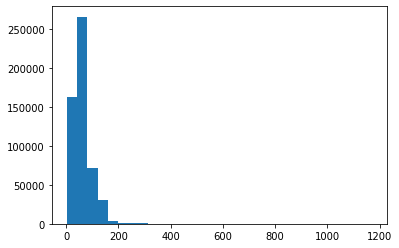

In [ ]:
import matplotlib

matplotlib.pyplot.hist(list(map(len, quora_list)), bins=30)

In [ ]:
!pip install sentence_transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 78 kB 591 kB/s 
     |████████████████████████████████| 3.1 MB 1.0 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=861b158b9907715e417809054b725a1d00bbaae7739b8156db54f7cd243078e7
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.19
    Uninstalling huggingface-hub-0.0.19:
      Successfully uninstalled huggingfac

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel, pipeline
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Trying the model on test sentences

In [ ]:
lines = [
    "Luke, I am your father.",
    "Life is what happens when you're busy making other plans.",
    ]

# tokenize a batch of inputs. "pt" means [p]y[t]orch tensors
embeddings = model.encode(lines)
print(embeddings)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[-2.05722395e-02 -1.91849079e-02  4.54866476e-02 -6.59513799e-03
  -5.72665036e-02 -1.91410538e-02  8.56852233e-02  2.86315251e-02
   6.78885430e-02 -3.74673679e-02  1.23939365e-02 -4.42134812e-02
   4.74235229e-02 -1.54133793e-02  6.49944395e-02 -3.87163050e-02
  -5.48810326e-03 -2.11122893e-02 -1.88245494e-02 -1.01714153e-02
  -4.96965609e-02  9.60848406e-02 -4.20744577e-03 -4.03349288e-02
   1.75606534e-02  4.34612036e-02  9.93380044e-03  6.57009147e-03
   1.88174900e-02 -4.86557595e-02  2.20062472e-02 -3.03076711e-02
   1.78406276e-02  1.96461449e-03 -1.11220693e-02 -2.49801949e-02
  -5.49474880e-02  3.19529958e-02  1.38892055e-01  3.25596035e-02
   4.64024208e-02  2.86372770e-02  8.12265426e-02 -6.19294532e-02
   8.03427175e-02  4.11614291e-02  4.98716123e-02  5.67934439e-02
   1.27868041e-01  8.04976225e-02 -3.01536638e-02 -4.29771980e-03
  -3.17755677e-02  5.43710291e-02  6.60325810e-02  4.80372943e-02
  -8.84086639e-03 -7.13132843e-02  4.24571112e-02  3.08932625e-02
  -6.10824

In [ ]:
def make_batches(sent_list, batch_size=128):
  return [sent_list[x:x+100] for x in range(0, len(sent_list), batch_size)]

def make_embeddings(batch_list):
  model.max_seq_length = 200
  return [model.encode(x) for x in batch_list]

In [ ]:
quora_batches = make_batches(quora_list, 512)

In [ ]:
quora_embeddings = make_embeddings(quora_batches)

In [ ]:
from torch import nn
import numpy as np

top_k = 5

test_questions = ['How to become a Data Scientist?',
                  "Why Americans don't know geography ?",
                 'Why Russia is European country, but not Asian?',
                 'Should I train my dog?',
                 'How to become a Winx fairy?',
                 'How to boil a potato?']

cos = nn.CosineSimilarity(dim=0, eps=1e-6)
quora_batches = np.array(quora_batches)

for q in test_questions:
  print('Question is: ', q)
  print()
  print('Top % d similar questions:' % top_k)
  emb_q = torch.from_numpy(model.encode(q))

  sim_values = []
  for batch in quora_embeddings:
    sim_values.append([cos(emb_q, x) for x in torch.from_numpy(batch)])
  
  sim_values = np.array(sim_values)
  indices = (-sim_values.flatten()).argsort()[:top_k]

  for num, i in enumerate(indices):
    print('%d. ' % (num + 1), quora_batches.flatten()[i])
    print('cosine similarity:', sim_values.flatten()[i])
  
  print('--------------------------------------')
  print()

Question is:  How to become a Data Scientist?

Top  5 similar questions:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1.  What is data science and how can I become a data scientist?
cosine similarity: 0.8857458
2.  How do I become a data scientist from software developer?
cosine similarity: 0.8784187
3.  How do I become a data scientist without a PhD?
cosine similarity: 0.85007155
4.  How can a fresh computer science graduate become a data scientist?
cosine similarity: 0.8417398
5.  How do I get a job as Data Scientist as a fresher?
cosine similarity: 0.8391087
--------------------------------------

Question is:  Why Americans don't know geography ?

Top  5 similar questions:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1.  Why are Europeans so ignorant about America?
cosine similarity: 0.61586976
2.  Why have so many people from western countries not heard of the country named Uzbekistan? Do they study geography?
cosine similarity: 0.5893
3.  Why is empiricism important in geography?
cosine similarity: 0.5499149
4.  How would you describe geography?
cosine similarity: 0.5452065
5.  Why does America still teach children that Christopher Columbus discovered the New World?
cosine similarity: 0.52926683
--------------------------------------

Question is:  Why Russia is European country, but not Asian?

Top  5 similar questions:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1.  Why isn't Russia considered part of Europe?
cosine similarity: 0.77940506
2.  Do people who live in eastern Russia look more Asian or more European?
cosine similarity: 0.6913386
3.  What does ASEAN countries think of Russia?
cosine similarity: 0.63773423
4.  When did Russia became a developed country?
cosine similarity: 0.62312883
5.  Is Turkey considered to be more in Asia or in Europe?
cosine similarity: 0.615665
--------------------------------------

Question is:  Should I train my dog?

Top  5 similar questions:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1.  How do you train a dog?
cosine similarity: 0.7966846
2.  What is the best way to train and discipline your dog?
cosine similarity: 0.74207383
3.  My dog doesn't listen to me. How do I train him?
cosine similarity: 0.7185526
4.  How can I house train my dogs?
cosine similarity: 0.71741605
5.  What is the training given to service dogs?
cosine similarity: 0.656276
--------------------------------------

Question is:  How to become a Winx fairy?

Top  5 similar questions:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1.  What is the fastest way to become a witch?
cosine similarity: 0.53880405
2.  How can I be a great magician?
cosine similarity: 0.49815783
3.  How can I be a witch?
cosine similarity: 0.48248878
4.  How does one become a legend?
cosine similarity: 0.44774684
5.  How do I become a great chess player?
cosine similarity: 0.43961644
--------------------------------------

Question is:  How to boil a potato?

Top  5 similar questions:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1.  What is the quickest way to boil potatoes?
cosine similarity: 0.8848519
2.  How do you can sliced potatoes?
cosine similarity: 0.66314095
3.  How do I roast a potato and a sweet potato in a convection microwave?
cosine similarity: 0.6473652
4.  What are ways to make mashed potatoes thicker?
cosine similarity: 0.5865116
5.  What products can be manufactured from potatoes?
cosine similarity: 0.5634108
--------------------------------------



```















```

__Bonus demo:__ transformer language models. 

`/* No points awarded for this task, but its really cool, we promise :) */`

In [ ]:
import torch
import numpy as np
from transformers import GPT2Tokenizer, GPT2LMHeadModel
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', add_prefix_space=True)
model = GPT2LMHeadModel.from_pretrained('gpt2').train(False).to(device)

text = "The Fermi paradox "
tokens = tokenizer.encode(text)
num_steps = 1024
line_length, max_length = 0, 70

print(end=tokenizer.decode(tokens))

for i in range(num_steps):
    with torch.no_grad():
        logits = model(torch.as_tensor([tokens], device=device))[0]
    p_next = torch.softmax(logits[0, -1, :], dim=-1).data.cpu().numpy()

    next_token_index = p_next.argmax() #<YOUR CODE: REPLACE THIS LINE>
    # YOUR TASK: change the code so that it performs nucleus sampling

    tokens.append(int(next_token_index))
    print(end=tokenizer.decode(tokens[-1]))
    line_length += len(tokenizer.decode(tokens[-1]))
    if line_length >= max_length:
        line_length = 0
        print()



Transformers knowledge hub: https://huggingface.co/transformers/